### Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from datetime import date
from datetime import datetime
today = date.today()

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

import xgboost
import shap

### Data Quality

In [3]:
df = pd.read_excel('Integra Employee Sample Data.xlsx')
df.head()

EEID        Full Name            Job Title   Department   Employee Group  \
0  E02813         Kai Chow  Engineering Manager  Engineering       Technology   
1  E04332      Luke Martin          Associate I   Operations      Call Center   
2  E01052      Jaxson Dinh          Associate I   Operations  Shared Services   
3  E03863  Madeline Watson           Supervisor   Operations      Call Center   
4  E01591    Paisley Trinh          Associate I   Operations      Call Center   

   Gender Marital Status      Education  Age  Hire Date  Annual Salary  \
0    Male        Married       Graduate   42 2015-04-12        2015000   
1    Male         Single  Undergraduate   24 2015-05-16         338000   
2    Male        Married       Graduate   25 2015-05-03         416000   
3  Female    Solo Parent       Graduate   36 2015-05-27         624000   
4  Female         Single       Graduate   23 2015-05-04         322400   

   Daily Rate  Hourly Rate  Bonus %  Salary Hike %      Country    City  \
0     7750.00       968.75     0.09           0.03  Philippines  Manila   
1     1300.00       162.50     0.05           0.04  Philippines  Manila   
2     1600.00       200.00     0.09           0.03  Philippines   Davao   
3     2400.00       300.00     0.07           0.04  Philippines   Davao   
4     1240.00       155.00     0.07           0.04  Philippines   Davao   

   Distance Fom Home (km)      Travel  Satisfaction Separation Type  Exit Date  
0                      20  Non_Travel             4       Voluntary 2015-11-27  
1                      25  Non_Travel             4       Voluntary 2015-12-10  
2                      18  Non_Travel             5       Voluntary 2016-05-26  
3                       1  Non_Travel             5       Voluntary 2016-06-18  
4                      11  Non_Travel             4       Voluntary 2016-09-04

In [4]:
df.shape

(1000, 22)

In [5]:
df.columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Employee Group',
       'Gender', 'Marital Status', 'Education', 'Age', 'Hire Date',
       'Annual Salary', 'Daily Rate', 'Hourly Rate', 'Bonus %',
       'Salary Hike %', 'Country', 'City', 'Distance Fom Home (km)', 'Travel',
       'Satisfaction', 'Separation Type', 'Exit Date'],
      dtype='object')

In [6]:
df.dtypes

EEID                              object
Full Name                         object
Job Title                         object
Department                        object
Employee Group                    object
Gender                            object
Marital Status                    object
Education                         object
Age                                int64
Hire Date                 datetime64[ns]
Annual Salary                      int64
Daily Rate                       float64
Hourly Rate                      float64
Bonus %                          float64
Salary Hike %                    float64
Country                           object
City                              object
Distance Fom Home (km)             int64
Travel                            object
Satisfaction                       int64
Separation Type                   object
Exit Date                 datetime64[ns]
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   EEID                    1000 non-null   object        
 1   Full Name               1000 non-null   object        
 2   Job Title               1000 non-null   object        
 3   Department              1000 non-null   object        
 4   Employee Group          1000 non-null   object        
 5   Gender                  1000 non-null   object        
 6   Marital Status          1000 non-null   object        
 7   Education               1000 non-null   object        
 8   Age                     1000 non-null   int64         
 9   Hire Date               1000 non-null   datetime64[ns]
 10  Annual Salary           1000 non-null   int64         
 11  Daily Rate              1000 non-null   float64       
 12  Hourly Rate             1000 non-null   float64  

In [8]:
df.isnull().sum()

EEID                        0
Full Name                   0
Job Title                   0
Department                  0
Employee Group              0
Gender                      0
Marital Status              0
Education                   0
Age                         0
Hire Date                   0
Annual Salary               0
Daily Rate                  0
Hourly Rate                 0
Bonus %                     0
Salary Hike %               0
Country                     0
City                        0
Distance Fom Home (km)      0
Travel                      0
Satisfaction                0
Separation Type           651
Exit Date                 651
dtype: int64

In [9]:
for cols in df.columns:
    print('-----------------------')
    print(cols)
    print(df[cols].value_counts())

-----------------------
EEID
E00276    3
E03349    3
E04972    3
E00717    3
E03694    3
E01499    3
E01639    2
E00013    2
E00671    2
E00145    2
E02613    2
E00568    2
E02166    2
E00085    2
E03583    2
E00647    2
E04095    2
E01883    2
E02563    2
E00972    2
E00306    2
E00287    2
E00446    2
E00672    2
E02391    2
E03890    2
E04131    2
E04035    2
E00555    2
E00691    2
E00836    2
E01090    2
E03354    2
E01638    2
E01584    2
E02938    2
E02534    2
E01870    2
E02770    2
E02848    2
E01194    2
E03849    2
E00170    2
E04415    2
E03305    2
E03268    2
E04732    2
E01286    2
E04359    2
E02024    2
E01132    2
E03750    2
E01807    2
E03278    2
E01388    2
E00440    2
E03720    2
E04562    2
E02857    2
E03830    2
E02185    2
E02492    2
E03824    2
E00245    2
E00431    2
E03247    2
E02769    2
E04332    2
E02639    2
E00758    2
E01895    2
E01525    2
E00952    2
E00530    2
E02706    2
E03058    2
E01249    2
E00436    2
E01052    2
E01488    2
E03807    2

In [10]:
df.describe()

Age  Annual Salary  Daily Rate  Hourly Rate  Bonus %  Salary Hike %  \
count 1000.00        1000.00     1000.00      1000.00  1000.00        1000.00   
mean    26.52      559557.40     2152.14       269.02     0.08           0.04   
std      4.64      560292.05     2154.97       269.37     0.02           0.01   
min     19.00      299000.00     1150.00       143.75     0.04           0.03   
25%     24.00      318500.00     1225.00       153.12     0.07           0.04   
50%     25.00      364000.00     1400.00       175.00     0.08           0.04   
75%     28.00      494000.00     1900.00       237.50     0.09           0.04   
max     42.00     3744000.00    14400.00      1800.00     0.12           0.05   

       Distance Fom Home (km)  Satisfaction  
count                 1000.00       1000.00  
mean                    13.00          3.81  
std                      7.27          0.83  
min                      1.00          2.00  
25%                      7.00          3.00  
50%                     13.00          4.00  
75%                     19.00          4.00  
max                     25.00          5.00

In [11]:
df.describe(include='all')

EEID      Full Name    Job Title  Department Employee Group  Gender  \
count     1000           1000         1000        1000           1000    1000   
unique     911            991           23           5              4       2   
top     E00276  Everly Walker  Associate I  Operations    Call Center  Female   
freq         3              2          609         803            659     518   
first      NaN            NaN          NaN         NaN            NaN     NaN   
last       NaN            NaN          NaN         NaN            NaN     NaN   
mean       NaN            NaN          NaN         NaN            NaN     NaN   
std        NaN            NaN          NaN         NaN            NaN     NaN   
min        NaN            NaN          NaN         NaN            NaN     NaN   
25%        NaN            NaN          NaN         NaN            NaN     NaN   
50%        NaN            NaN          NaN         NaN            NaN     NaN   
75%        NaN            NaN          NaN         NaN            NaN     NaN   
max        NaN            NaN          NaN         NaN            NaN     NaN   

       Marital Status Education     Age            Hire Date  Annual Salary  \
count            1000      1000 1000.00                 1000        1000.00   
unique              4         3     NaN                  838            NaN   
top            Single  Graduate     NaN  2017-10-20 00:00:00            NaN   
freq              671       781     NaN                    6            NaN   
first             NaN       NaN     NaN  2015-01-02 00:00:00            NaN   
last              NaN       NaN     NaN  2022-12-18 00:00:00            NaN   
mean              NaN       NaN   26.52                  NaN      559557.40   
std               NaN       NaN    4.64                  NaN      560292.05   
min               NaN       NaN   19.00                  NaN      299000.00   
25%               NaN       NaN   24.00                  NaN      318500.00   
50%               NaN       NaN   25.00                  NaN      364000.00   
75%               NaN       NaN   28.00                  NaN      494000.00   
max               NaN       NaN   42.00                  NaN     3744000.00   

        Daily Rate  Hourly Rate  Bonus %  Salary Hike %      Country    City  \
count      1000.00      1000.00  1000.00        1000.00         1000    1000   
unique         NaN          NaN      NaN            NaN            1       3   
top            NaN          NaN      NaN            NaN  Philippines  Manila   
freq           NaN          NaN      NaN            NaN         1000     606   
first          NaN          NaN      NaN            NaN          NaN     NaN   
last           NaN          NaN      NaN            NaN          NaN     NaN   
mean       2152.14       269.02     0.08           0.04          NaN     NaN   
std        2154.97       269.37     0.02           0.01          NaN     NaN   
min        1150.00       143.75     0.04           0.03          NaN     NaN   
25%        1225.00       153.12     0.07           0.04          NaN     NaN   
50%        1400.00       175.00     0.08           0.04          NaN     NaN   
75%        1900.00       237.50     0.09           0.04          NaN     NaN   
max       14400.00      1800.00     0.12           0.05          NaN     NaN   

        Distance Fom Home (km)      Travel  Satisfaction Separation Type  \
count                  1000.00        1000       1000.00             349   
unique                     NaN           3           NaN               3   
top                        NaN  Non_Travel           NaN     Involuntary   
freq                       NaN         874           NaN             243   
first                      NaN         NaN           NaN             NaN   
last                       NaN         NaN           NaN             NaN   
mean                     13.00         NaN          3.81             NaN   
std                       7.27         

### Data Correlation

In [12]:
df.corr().style.background_gradient(cmap='Reds')

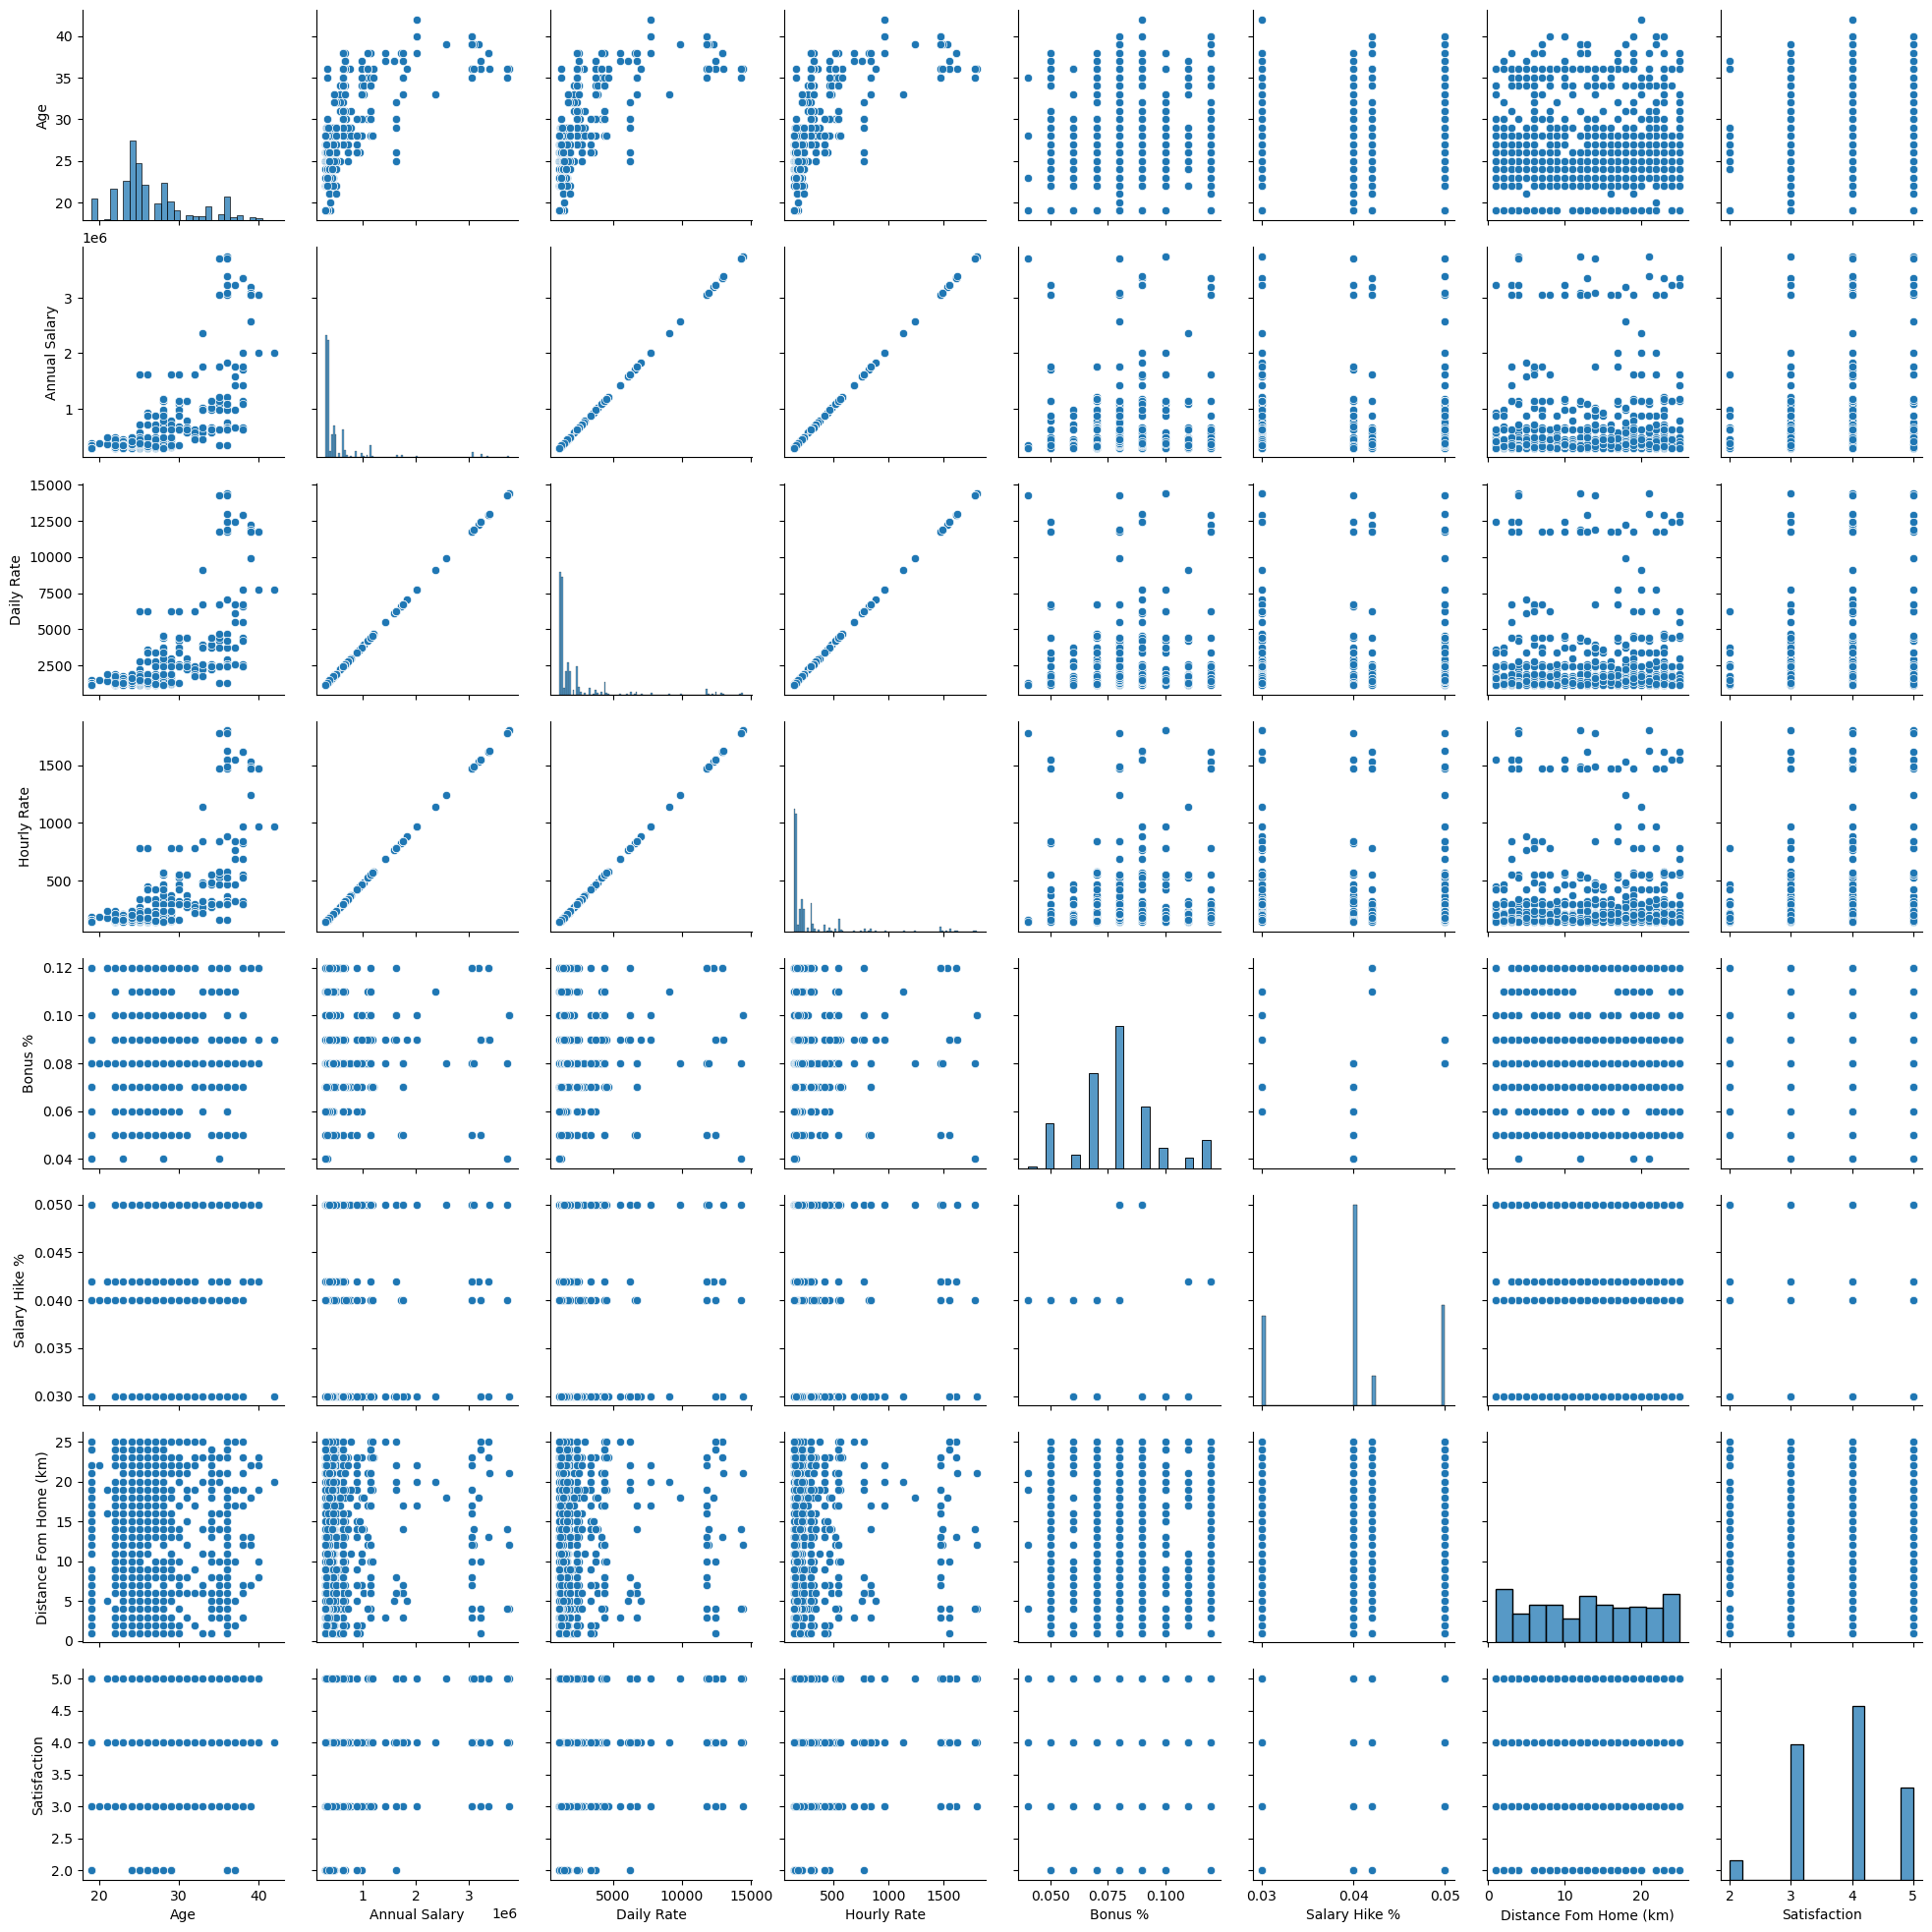

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Annual Salary'>

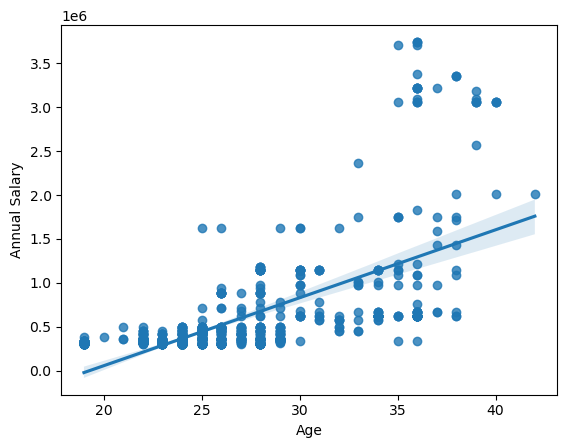

In [14]:
# Age vs Annual Salary
sns.regplot(x=df['Age'], y=df['Annual Salary'])

<AxesSubplot:xlabel='Age', ylabel='Daily Rate'>

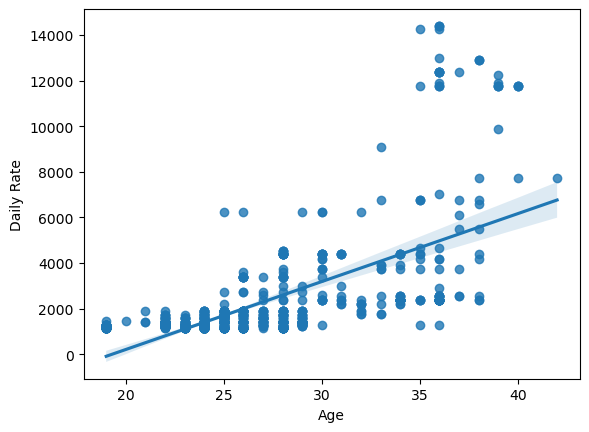

In [15]:
# Age vs Daily Rate
sns.regplot(x=df['Age'], y=df['Daily Rate'])

<AxesSubplot:xlabel='Age', ylabel='Hourly Rate'>

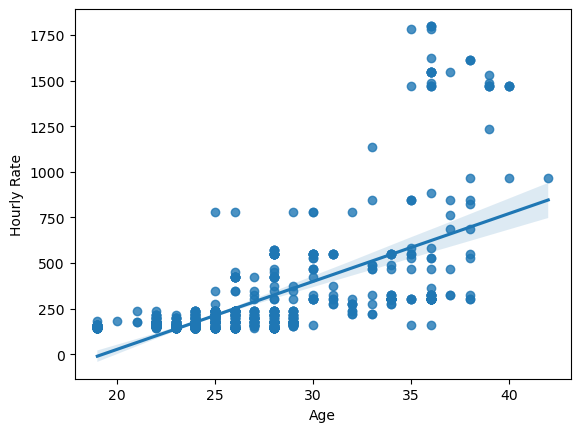

In [16]:
# Age vs Hourly Rate
sns.regplot(x=df['Age'], y=df['Hourly Rate'])

<AxesSubplot:xlabel='Annual Salary', ylabel='Daily Rate'>

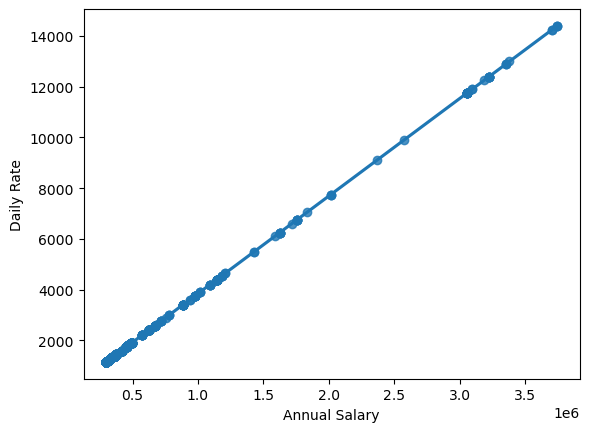

In [17]:
# Annual Salary vs Daily Rate
sns.regplot(x=df['Annual Salary'], y=df['Daily Rate'])

<AxesSubplot:>

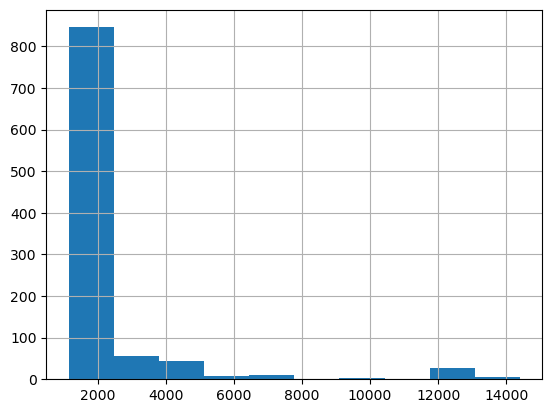

In [18]:
df['Daily Rate'].hist()

### Univariate

<AxesSubplot:xlabel='count', ylabel='Job Title'>

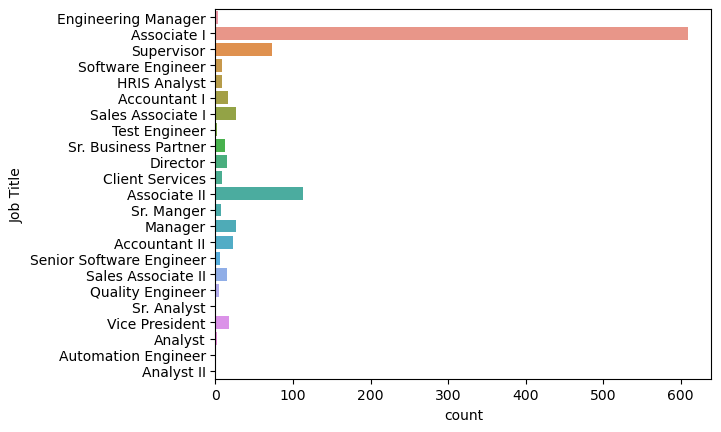

In [19]:
sns.countplot(data=df, y='Job Title')

<AxesSubplot:xlabel='count', ylabel='Department'>

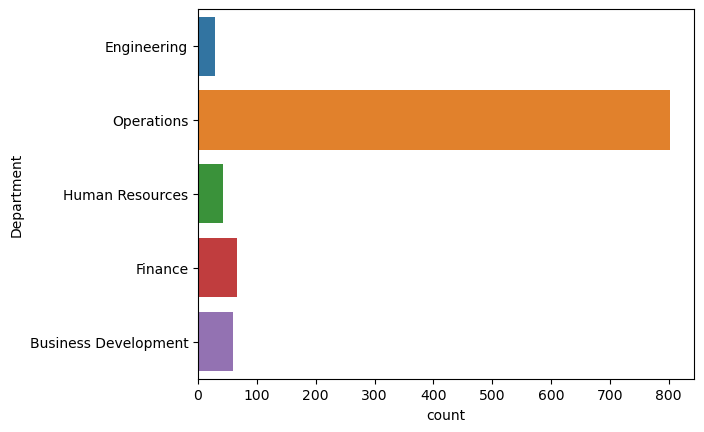

In [20]:
sns.countplot(data=df, y='Department')

In [21]:
df_department = pd.DataFrame(df['Department'].value_counts().reset_index().rename(columns={'index':'Department','Department':'count'}))
df_department

Department  count
0            Operations    803
1               Finance     67
2  Business Development     59
3       Human Resources     42
4           Engineering     29

([<matplotlib.patches.Wedge at 0x1fd0c51ec40>,
 [Text(-0.8959727462436013, 0.6381479749938092, 'Operations'),
  Text(0.5688439361247785, -0.9414969868959057, 'Finance'),
  Text(0.8878829641614185, -0.6493564829521095, 'Business Development'),
  Text(1.0461621146169688, -0.33991885787662984, 'Human Resources'),
  Text(1.0954379551905509, -0.10007840090621456, 'Engineering')],
 [Text(-0.48871240704196434, 0.3480807136329868, '80%'),
  Text(0.3102785106135155, -0.5135438110341303, '7%'),
  Text(0.484299798633501, -0.3541944452466051, '6%'),
  Text(0.5706338807001647, -0.18541028611452537, '4%'),
  Text(0.5975116119221185, -0.054588218676117024, '3%')])

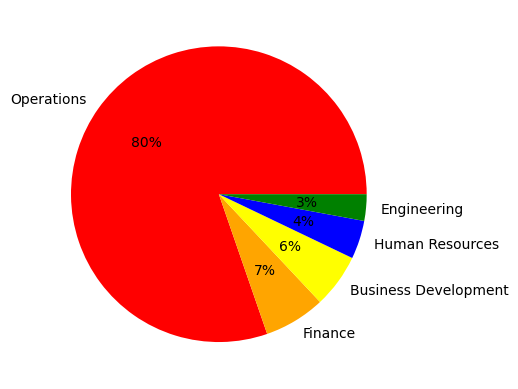

In [22]:
plt.pie(df_department['count'], labels=df_department['Department'], colors=['red','orange','yellow','blue','green'],autopct='%.0f%%')

<AxesSubplot:xlabel='Employee Group', ylabel='count'>

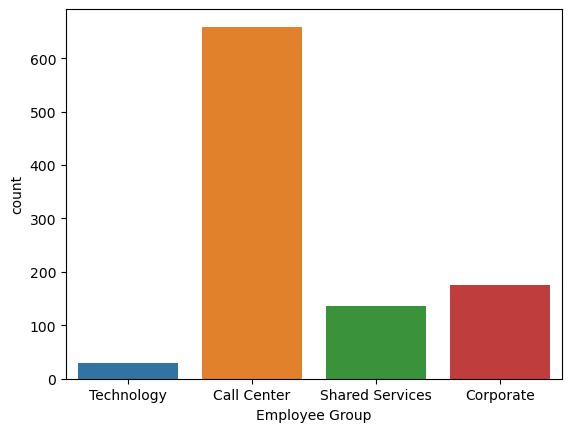

In [23]:
sns.countplot(data=df, x='Employee Group')

<AxesSubplot:xlabel='Gender', ylabel='count'>

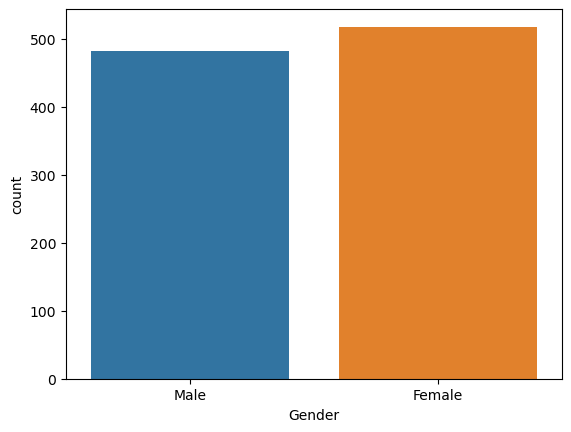

In [24]:
sns.countplot(data=df, x='Gender')

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

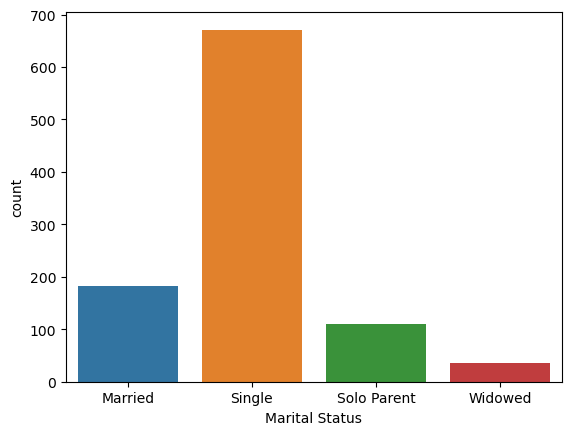

In [25]:
sns.countplot(data=df, x='Marital Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

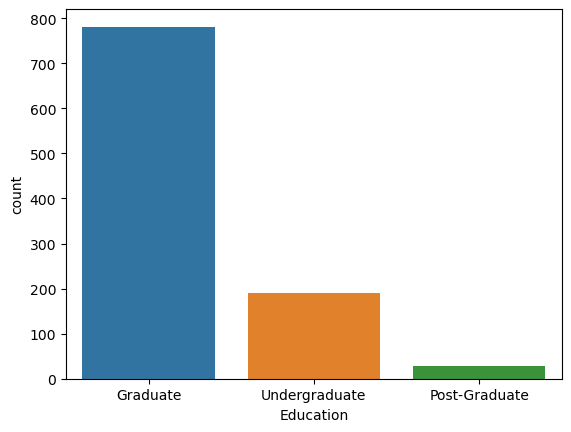

In [26]:
sns.countplot(data=df, x='Education')

<AxesSubplot:xlabel='City', ylabel='count'>

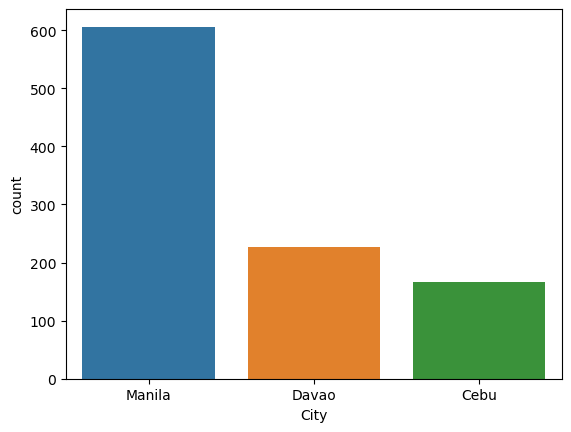

In [27]:
sns.countplot(data=df, x='City')

<AxesSubplot:xlabel='Travel', ylabel='count'>

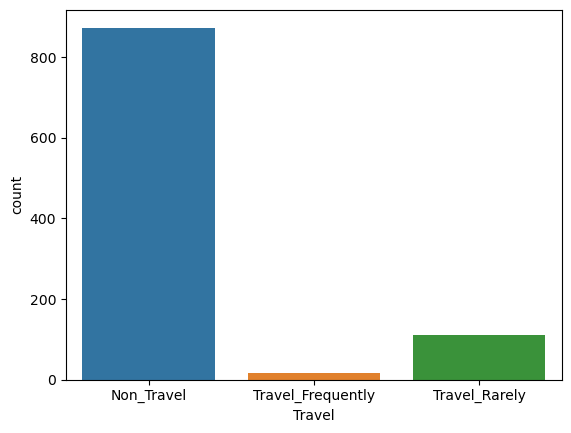

In [28]:
sns.countplot(data=df, x='Travel')

<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

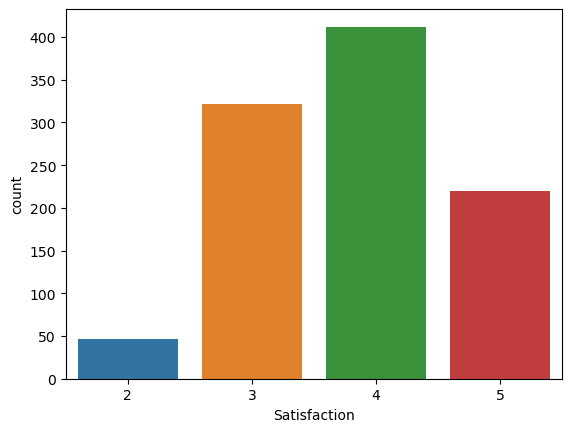

In [29]:
sns.countplot(data=df, x='Satisfaction')

<AxesSubplot:xlabel='Separation Type', ylabel='count'>

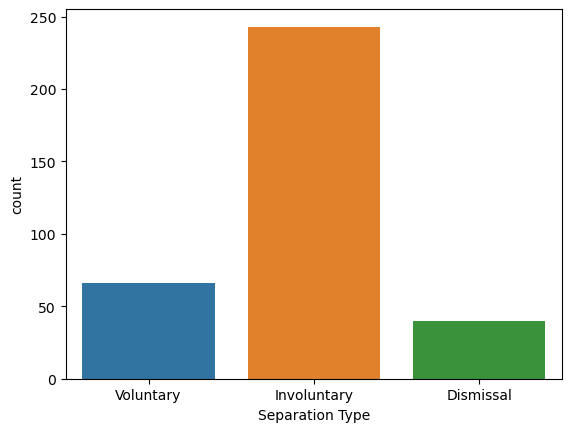

In [30]:
sns.countplot(data=df, x='Separation Type')

### Feature Engineering

In [31]:
df['Exit Date'].fillna(' ', inplace=True)
df['Tenureship'] = df.apply(lambda x: (datetime.now() - x['Hire Date']).days  if x['Exit Date'] == ' ' else (x['Exit Date'] - x['Hire Date']).days, axis=1)
df['Tenureship'].fillna(0, inplace=True)

df_salary_grade = pd.read_excel("Salary_Grade.xlsx")
df_salary_grade.head()

## Feature Engineer: Distance Fom Home (km)

Salary Grade  Minimum Monthly Salary  Annual
0             1                   12517  150204
1             2                   13305  159660
2             3                   14125  169500
3             4                   14993  179916
4             5                   15909  190908

In [32]:
def get_salary_grade(x):
    for index, row in df_salary_grade.iterrows():
        if x >= row['Annual'] and x < df_salary_grade['Annual'][index+1]:
            return row['Salary Grade']
            break
        
df['Annual Salary Grade'] = df['Annual Salary'].apply(lambda x: get_salary_grade(x))

df['Status'] = df['Exit Date'].apply(lambda x: 'active' if x == ' ' else 'churn')
df.head()

EEID        Full Name            Job Title   Department   Employee Group  \
0  E02813         Kai Chow  Engineering Manager  Engineering       Technology   
1  E04332      Luke Martin          Associate I   Operations      Call Center   
2  E01052      Jaxson Dinh          Associate I   Operations  Shared Services   
3  E03863  Madeline Watson           Supervisor   Operations      Call Center   
4  E01591    Paisley Trinh          Associate I   Operations      Call Center   

   Gender Marital Status      Education  Age  Hire Date  Annual Salary  \
0    Male        Married       Graduate   42 2015-04-12        2015000   
1    Male         Single  Undergraduate   24 2015-05-16         338000   
2    Male        Married       Graduate   25 2015-05-03         416000   
3  Female    Solo Parent       Graduate   36 2015-05-27         624000   
4  Female         Single       Graduate   23 2015-05-04         322400   

   Daily Rate  Hourly Rate  Bonus %  Salary Hike %      Country    City  \
0     7750.00       968.75     0.09           0.03  Philippines  Manila   
1     1300.00       162.50     0.05           0.04  Philippines  Manila   
2     1600.00       200.00     0.09           0.03  Philippines   Davao   
3     2400.00       300.00     0.07           0.04  Philippines   Davao   
4     1240.00       155.00     0.07           0.04  Philippines   Davao   

   Distance Fom Home (km)      Travel  Satisfaction Separation Type  \
0                      20  Non_Travel             4       Voluntary   
1                      25  Non_Travel             4       Voluntary   
2                      18  Non_Travel             5       Voluntary   
3                       1  Non_Travel             5       Voluntary   
4                      11  Non_Travel             4       Voluntary   

             Exit Date  Tenureship  Annual Salary Grade Status  
0  2015-11-27 00:00:00         229                   29  churn  
1  2015-12-10 00:00:00         208                   12  churn  
2  2016-05-26 00:00:00         389                   14  churn  
3  2016-06-18 00:00:00         388                   19  churn  
4  2016-09-04 00:00:00         489                   11  churn

<AxesSubplot:>

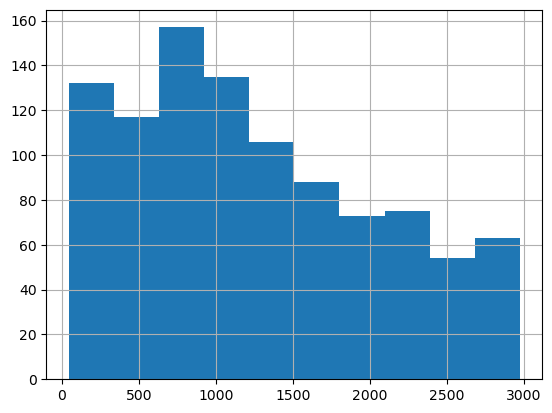

In [33]:
df['Tenureship'].hist()

<AxesSubplot:>

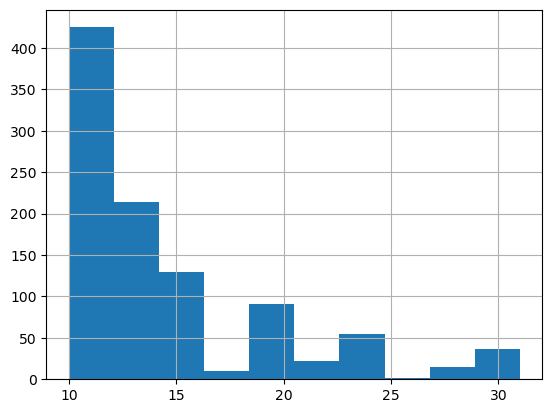

In [34]:
df['Annual Salary Grade'].hist()

<AxesSubplot:>

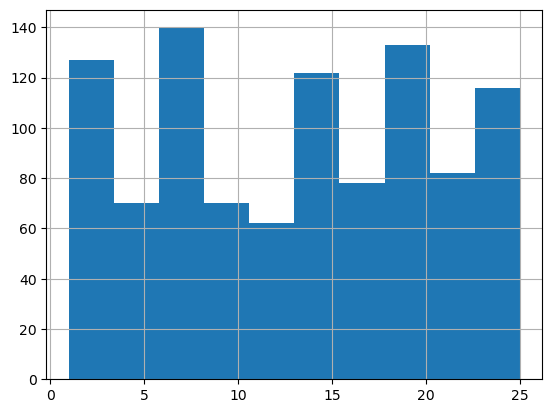

In [35]:
df['Distance Fom Home (km)'].hist()

In [36]:
df.groupby(['Status','Age'])['Status'].count()

Status  Age
active  19      48
        20       1
        21       3
        22      69
        23      85
        24     157
        25      86
        26      24
        27      28
        28      11
        29      27
        30      21
        31      10
        32       3
        34       1
        35      15
        36      50
        37       7
        38       5
churn   19       3
        22       5
        23      10
        24      33
        25      50
        26      61
        27      13
        28      78
        29      17
        30       2
        31       1
        32       7
        33      10
        34      33
        36       6
        38       7
        39       7
        40       5
        42       1
Name: Status, dtype: int64

In [37]:
def category_to_label(df_col):
    le.fit(df_col)
    df_col = le.transform(df_col)
    return df_col

df['Job Title'] = category_to_label(df['Job Title'])
df['Department'] = category_to_label(df['Department'])
df['Employee Group'] = category_to_label(df['Employee Group'])
df['Gender'] = category_to_label(df['Gender'])
df['Marital Status'] = category_to_label(df['Marital Status'])
df['Education'] = category_to_label(df['Education'])
df['Country'] = category_to_label(df['Country'])
df['City'] = category_to_label(df['City'])
df['Travel'] = category_to_label(df['Travel'])
df['Status'] = category_to_label(df['Status'])

df.head()

EEID        Full Name  Job Title  Department  Employee Group  Gender  \
0  E02813         Kai Chow          9           1               3       1   
1  E04332      Luke Martin          4           4               0       1   
2  E01052      Jaxson Dinh          4           4               2       1   
3  E03863  Madeline Watson         20           4               0       0   
4  E01591    Paisley Trinh          4           4               0       0   

   Marital Status  Education  Age  Hire Date  Annual Salary  Daily Rate  \
0               0          0   42 2015-04-12        2015000     7750.00   
1               1          2   24 2015-05-16         338000     1300.00   
2               0          0   25 2015-05-03         416000     1600.00   
3               2          0   36 2015-05-27         624000     2400.00   
4               1          0   23 2015-05-04         322400     1240.00   

   Hourly Rate  Bonus %  Salary Hike %  Country  City  Distance Fom Home (km)  \
0       968.75     0.09           0.03        0     2                      20   
1       162.50     0.05           0.04        0     2                      25   
2       200.00     0.09           0.03        0     1                      18   
3       300.00     0.07           0.04        0     1                       1   
4       155.00     0.07           0.04        0     1                      11   

   Travel  Satisfaction Separation Type            Exit Date  Tenureship  \
0       0             4       Voluntary  2015-11-27 00:00:00         229   
1       0             4       Voluntary  2015-12-10 00:00:00         208   
2       0             5       Voluntary  2016-05-26 00:00:00         389   
3       0             5       Voluntary  2016-06-18 00:00:00         388   
4       0             4       Voluntary  2016-09-04 00:00:00         489   

   Annual Salary Grade  Status  
0                   29       1  
1                   12       1  
2                   14       1  
3                   19       1  
4                   11       1

### Feature Selection

In [38]:
# Individual details not that important
df.drop(['EEID','Full Name','Country','Exit Date','Hire Date','Separation Type','Annual Salary','Daily Rate','Hourly Rate','Marital Status'],axis=1,inplace=True)
df.head()

Job Title  Department  Employee Group  Gender  Education  Age  Bonus %  \
0          9           1               3       1          0   42     0.09   
1          4           4               0       1          2   24     0.05   
2          4           4               2       1          0   25     0.09   
3         20           4               0       0          0   36     0.07   
4          4           4               0       0          0   23     0.07   

   Salary Hike %  City  Distance Fom Home (km)  Travel  Satisfaction  \
0           0.03     2                      20       0             4   
1           0.04     2                      25       0             4   
2           0.03     1                      18       0             5   
3           0.04     1                       1       0             5   
4           0.04     1                      11       0             4   

   Tenureship  Annual Salary Grade  Status  
0         229                   29       1  
1         208                   12       1  
2         389                   14       1  
3         388                   19       1  
4         489                   11       1

In [39]:
df.corr().style.background_gradient(cmap='Reds')

### Split: Train, Test, Validation 

In [40]:
df_churned = df[df['Status']==1].copy()
df_active = df[df['Status']==0].copy()

df_churned.shape, df_active.shape

((349, 15), (651, 15))

In [41]:
df_holdout = pd.concat([df_churned[:100],df_active[:100]]).reset_index(drop=True)
df_ml = pd.concat([df_churned[100:],df_active[100:]]).reset_index(drop=True)
df_holdout.shape, df_ml.shape

((200, 15), (800, 15))

In [42]:
x = df_ml.drop(["Status"], axis=1)
y = df_ml["Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((560, 14), (240, 14), (560,), (240,))

### Model Training

In [43]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=20, random_state=25)

clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=25)

### Model Explainer

In [44]:
# train an XGBoost model
model_explainer = xgboost.XGBRegressor().fit(x_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model_explainer)

shap_values = explainer(x_test)
df_dt_init_explainer = pd.DataFrame(shap_values.values, columns=x_test.columns)
df_dt_init_explainer.head()

Job Title  Department  Employee Group  Gender  Education   Age  Bonus %  \
0       0.06        0.00            0.01   -0.01      -0.00  0.38     0.00   
1       0.44       -0.00            0.00    0.01       0.01 -0.08     0.02   
2       0.15       -0.00            0.00   -0.00      -0.03 -0.03     0.01   
3      -0.03       -0.00           -0.00   -0.01      -0.00 -0.11     0.03   
4       0.17       -0.00            0.00   -0.01      -0.00  0.18     0.03   

   Salary Hike %  City  Distance Fom Home (km)  Travel  Satisfaction  \
0           0.00 -0.01                   -0.00    0.00          0.03   
1           0.02 -0.01                    0.08   -0.00          0.00   
2          -0.01  0.00                   -0.00   -0.00         -0.04   
3          -0.01  0.00                    0.01   -0.00          0.00   
4           0.06 -0.00                   -0.00   -0.00          0.04   

   Tenureship  Annual Salary Grade  
0        0.10                 0.03  
1        0.08                 0.01  
2       -0.38                 0.01  
3       -0.17                -0.01  
4        0.29                 0.00

In [45]:
list_factor_1 = []
list_factor_2 = []
list_factor_3 = []
list_factor_4 = []
list_factor_5 = []
list_factor_6 = []
list_factor_7 = []
list_factor_8 = []
list_factor_9 = []
list_factor_10 = []
list_factor_11 = []
list_factor_12 = []
list_factor_13 = []
list_factor_14 = []

list_factors = [list_factor_1, list_factor_2, list_factor_3, list_factor_4, list_factor_5, 
                list_factor_6, list_factor_7, list_factor_8, list_factor_9, list_factor_10,
                list_factor_11, list_factor_12, list_factor_13, list_factor_14
               ]

list_score_1 = []
list_score_2 = []
list_score_3 = []
list_score_4 = []
list_score_5 = []
list_score_6 = []
list_score_7 = []
list_score_8 = []
list_score_9 = []
list_score_10 = []
list_score_11 = []
list_score_12 = []
list_score_13 = []
list_score_14 = []

list_scores = [list_score_1, list_score_2, list_score_3, list_score_4, list_score_5, 
                list_score_6, list_score_7, list_score_8, list_score_9, list_score_10,
                list_score_11, list_score_12, list_score_13, list_score_14
               ]

for index, row in df_dt_init_explainer.iterrows():
    _temp = row.sort_values(ascending=False)
    # temporary df for getting each factor as a column with each score
    df_temp = pd.DataFrame(_temp).reset_index().rename(columns={'index':'Columns', index: 'Score'})
    
    # absolute value for each score
    df_temp['Score'] = df_temp['Score'].apply(lambda x: abs(x))
    df_temp.sort_values(by='Score',ascending=False, inplace=True)
    df_temp = df_temp.reset_index(drop=True)
    
    # get columns and scores
    x=0
    for index_in, row_in in df_temp.iterrows():
        list_factors[x].append(row_in['Columns'])
        list_scores[x].append(row_in['Score'])
        x=x+1
        
df_final_explainer = pd.DataFrame()
df_final_explainer['Factor_1'] = list_factor_1
df_final_explainer['Score_1'] = list_score_1
df_final_explainer['Factor_2'] = list_factor_2
df_final_explainer['Score_2'] = list_score_2
df_final_explainer['Factor_3'] = list_factor_3
df_final_explainer['Score_3'] = list_score_3
df_final_explainer['Factor_4'] = list_factor_4
df_final_explainer['Score_4'] = list_score_4
df_final_explainer['Factor_5'] = list_factor_5
df_final_explainer['Score_5'] = list_score_5

df_final_explainer['Factor_6'] = list_factor_6
df_final_explainer['Score_6'] = list_score_6
df_final_explainer['Factor_7'] = list_factor_7
df_final_explainer['Score_7'] = list_score_7
df_final_explainer['Factor_8'] = list_factor_8
df_final_explainer['Score_8'] = list_score_8
df_final_explainer['Factor_9'] = list_factor_9
df_final_explainer['Score_9'] = list_score_9
df_final_explainer['Factor_10'] = list_factor_10
df_final_explainer['Score_10'] = list_score_10

df_final_explainer['Factor_11'] = list_factor_11
df_final_explainer['Score_11'] = list_score_11
df_final_explainer['Factor_12'] = list_factor_12
df_final_explainer['Score_12'] = list_score_12
df_final_explainer['Factor_13'] = list_factor_13
df_final_explainer['Score_13'] = list_score_13
df_final_explainer['Factor_14'] = list_factor_14
df_final_explainer['Score_14'] = list_score_14
df_final_explainer.head()

Factor_1  Score_1    Factor_2  Score_2                Factor_3  Score_3  \
0         Age     0.38  Tenureship     0.10               Job Title     0.06   
1   Job Title     0.44         Age     0.08  Distance Fom Home (km)     0.08   
2  Tenureship     0.38   Job Title     0.15            Satisfaction     0.04   
3  Tenureship     0.17         Age     0.11                 Bonus %     0.03   
4  Tenureship     0.29         Age     0.18               Job Title     0.17   

              Factor_4  Score_4             Factor_5  Score_5  \
0  Annual Salary Grade     0.03         Satisfaction     0.03   
1           Tenureship     0.08        Salary Hike %     0.02   
2                  Age     0.03            Education     0.03   
3            Job Title     0.03  Annual Salary Grade     0.01   
4        Salary Hike %     0.06         Satisfaction     0.04   

                 Factor_6  Score_6       Factor_7  Score_7  \
0          Employee Group     0.01           City     0.01   
1                 Bonus %     0.02      Education     0.01   
2                 Bonus %     0.01  Salary Hike %     0.01   
3  Distance Fom Home (km)     0.01  Salary Hike %     0.01   
4                 Bonus %     0.03         Gender     0.01   

                 Factor_8  Score_8                Factor_9  Score_9  \
0                  Gender     0.01  Distance Fom Home (km)     0.00   
1                  Gender     0.01                    City     0.01   
2     Annual Salary Grade     0.01                  Gender     0.00   
3                  Gender     0.01          Employee Group     0.00   
4  Distance Fom Home (km)     0.00          Employee Group     0.00   

             Factor_10  Score_10               Factor_11  Score_11  \
0              Bonus %      0.00              Department      0.00   
1  Annual Salary Grade      0.01          Employee Group      0.00   
2               Travel      0.00  Distance Fom Home (km)      0.00   
3            Education      0.00            Satisfaction      0.00   
4               Travel      0.00     Annual Salary Grade      0.00   

       Factor_12  Score_12       Factor_13  Score_13   Factor_14  Score_14  
0  Salary Hike %      0.00       Education      0.00      Travel      0.00  
1         Travel      0.00    Satisfaction      0.00  Department      0.00  
2           City      0.00  Employee Group      0.00  Department      0.00  
3         Travel      0.00      Department      0.00        City      0.00  
4           City      0.00       Education      0.00  Department      0.00

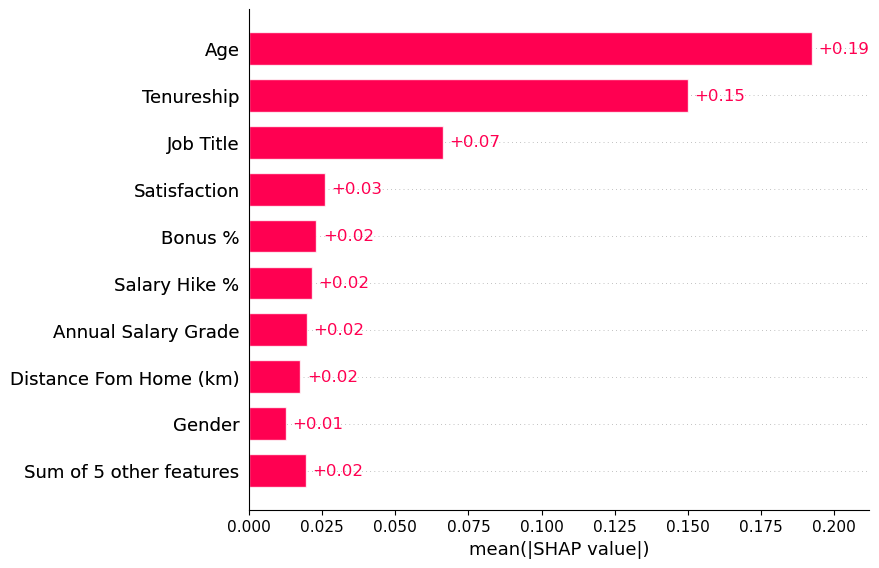

In [46]:
shap.plots.bar(shap_values)

### Model Validation

In [47]:
y_pred = clf.predict(x_test)

#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

87.92%


In [48]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       165
           1       0.81      0.80      0.81        75

    accuracy                           0.88       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.88      0.88      0.88       240




In [49]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[151  14]
 [ 15  60]]


In [50]:
#Extract the feature importance
f_importance = clf.feature_importances_

#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

#Sort the values in Descending order (Most Important -> Least Important)
# df_feature_importance.sort_values(["Importance"],ascending=False)

df_feature_importance.sort_values(by='Importance',ascending=False).reset_index().rename(columns={'index':'Factors'})

Factors  Importance
0                      Age        0.38
1               Tenureship        0.31
2                Job Title        0.11
3             Satisfaction        0.06
4      Annual Salary Grade        0.04
5            Salary Hike %        0.04
6   Distance Fom Home (km)        0.02
7                  Bonus %        0.02
8                   Gender        0.02
9                     City        0.00
10              Department        0.00
11          Employee Group        0.00
12               Education        0.00
13                  Travel        0.00

<AxesSubplot:>

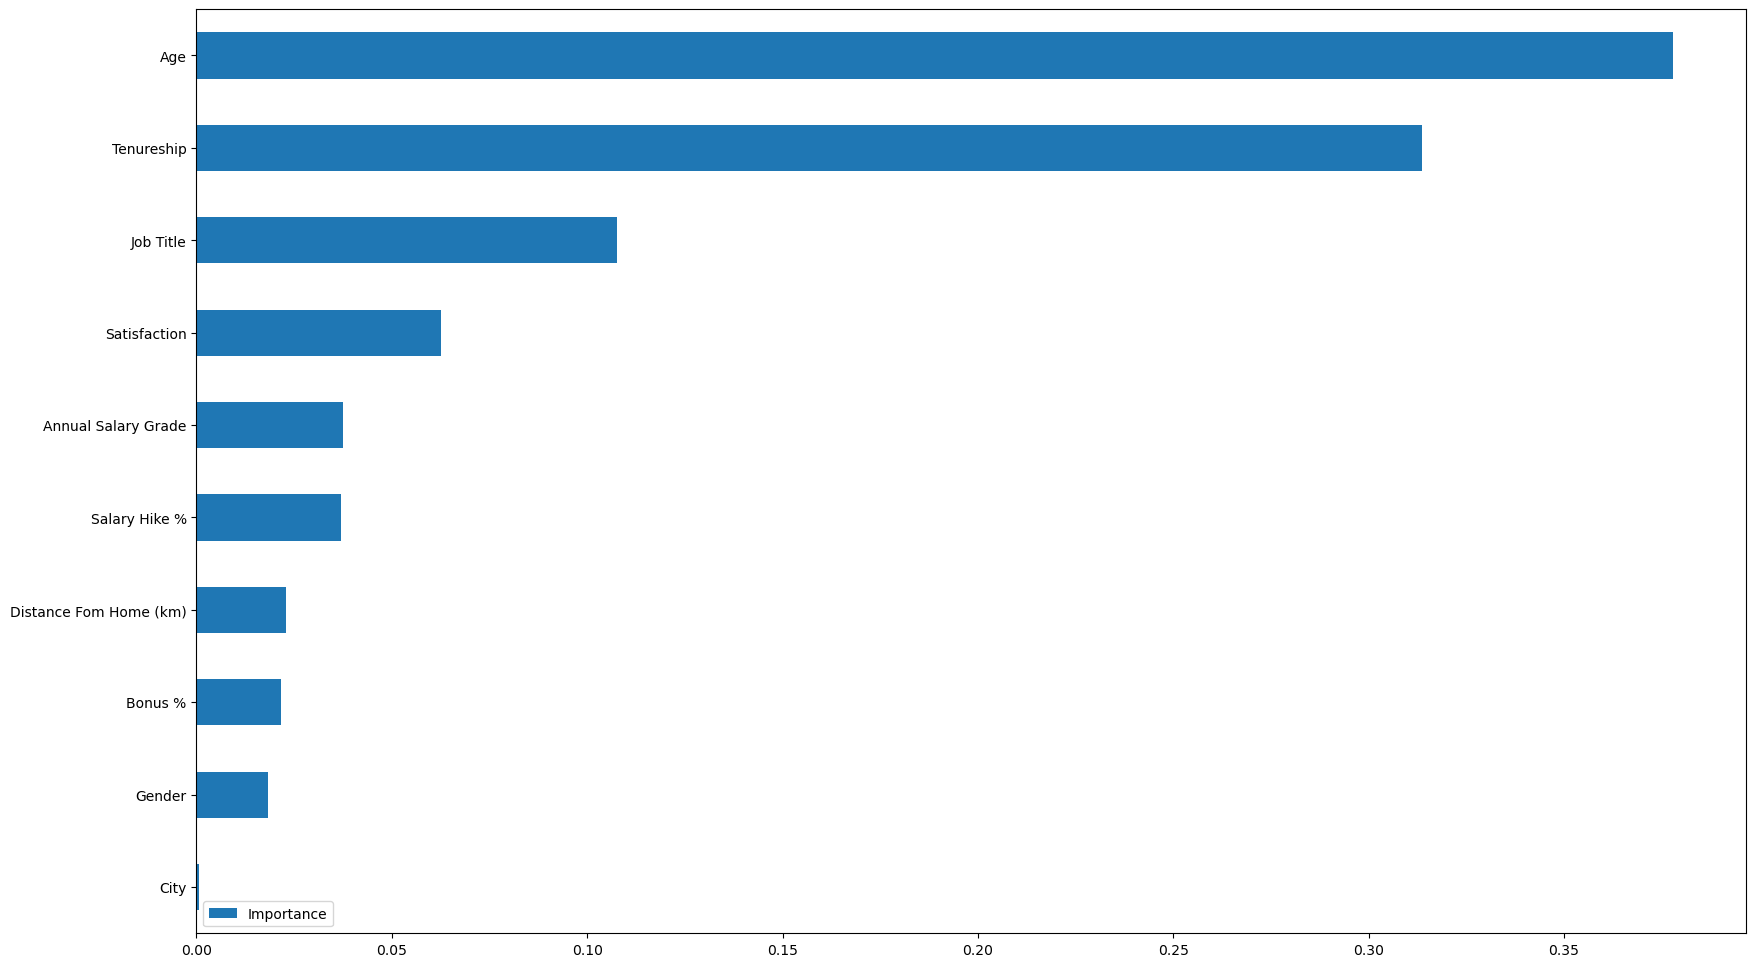

In [51]:
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_asc.plot(kind='barh', figsize=(20,12))

In [52]:
feature_col = list(x_train.columns)

#Get classes
classes = clf.classes_

#Convert to String if number
classes = ["%s" % clas for clas in classes]

classes

['0', '1']

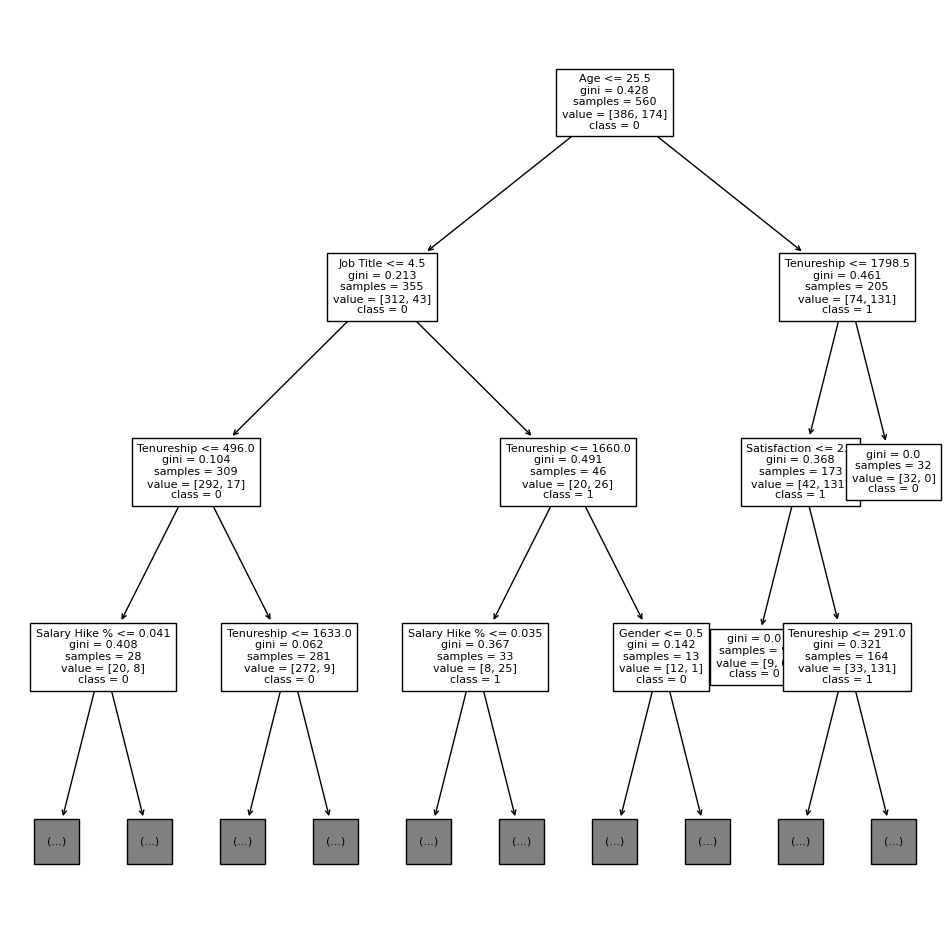

In [53]:
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))  

#Use the plot tree function
plot_tree(clf, class_names=classes, feature_names=feature_col, fontsize=8, max_depth=3)

#Show the Plot
plt.show()

### Holdout Testing

In [54]:
df_holdout_testing = df_holdout.drop(["Status"], axis=1)
actual = df_holdout["Status"]
predicted = clf.predict(df_holdout_testing)

In [55]:
#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(actual,predicted)))

61.50%


In [56]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(actual, predicted)))

Classification report for classifier DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       100
           1       0.60      0.72      0.65       100

    accuracy                           0.61       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.62      0.61      0.61       200




In [57]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(actual,predicted))

Confusion Matrix: 
[[51 49]
 [28 72]]


In [58]:
df_holdout_testing['Actual'] = actual
df_holdout_testing['Predicted'] = predicted
df_holdout_testing

Job Title  Department  Employee Group  Gender  Education  Age  Bonus %  \
0            9           1               3       1          0   42     0.09   
1            4           4               0       1          2   24     0.05   
2            4           4               2       1          0   25     0.09   
3           20           4               0       0          0   36     0.07   
4            4           4               0       0          0   23     0.07   
5            4           4               0       0          2   22     0.07   
6            4           4               0       1          0   25     0.07   
7            4           4               2       1          0   23     0.08   
8           16           1               3       0          0   31     0.05   
9           10           3               1       1          0   28     0.08   
10           4           4               0       1          2   24     0.05   
11           4           4               0       0          2   23     0.08   
12           0           2               1       0          0   28     0.09   
13          20           4               0       0          2   34     0.07   
14           4           4               0       0          2   19     0.08   
15          13           0               1       0          0   26     0.09   
16          21           1               3       1          0   34     0.08   
17          18           3               1       0          0   30     0.07   
18          20           4               0       0          0   34     0.07   
19           8           3               1       0          0   38     0.09   
20           7           0               1       1          0   28     0.08   
21           5           4               0       1          0   25     0.05   
22           5           4               2       0          0   25     0.09   
23          13           0               1       0          0   25     0.05   
24           5           4               0       1          0   28     0.08   
25           4           4               0       0          0   25     0.07   
26          13           0               1       0          0   25     0.08   
27          18           3               1       1          0   30     0.07   
28           4           4               0       1          2   28     0.05   
29           4           4               0       1          0   25     0.09   
30           4           4               0       1          0   26     0.08   
31           8           2               1       0          0   39     0.08   
32           4           4               2       0          0   23     0.08   
33           4           4               0       1          0   28     0.07   
34           4           4               0       1          0   28     0.05   
35           5           4               0       0          0   24     0.05   
36          19           3               1       1          0   38     0.09   
37           5           4               0       0          0   25     0.08   
38           4           4               0       1          2   24     0.05   
39          20           4               0       0          0   34     0.07   
40           4           4               0       0          0   24     0.07   
41           4           4               0       0          0   26     0.07   
42          13           0               1       1          0   26     0.11   
43           8           2               1       1          1   40     0.12   
44          20           4               2       0          0   34     0.09   
45          18           3               1       0          0   33     0.08   
46           4           4               0       0          0   26     0.09   
47           4           4               0       0          0   28     0.07   
48           4           4               2       1          0   25     0.08   
49           5           4               2       1     

### Attrition Prediction using Decision Tree


In [59]:
df_active_dt = df_active.drop('Status',axis=1)
attrition_dt = clf.predict(df_active_dt)
attrition_dt

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
df_active_dt.shape

(651, 14)

In [61]:
shap_values = explainer(df_active_dt)
df_dt_init_explainer = pd.DataFrame(shap_values.values, columns=df_active_dt.columns)
df_dt_init_explainer.head()

Job Title  Department  Employee Group  Gender  Education   Age  Bonus %  \
0       0.03        0.00           -0.00   -0.00      -0.00 -0.07     0.03   
1       0.09        0.00            0.00   -0.01       0.00  0.21    -0.00   
2       0.02        0.00           -0.00    0.02       0.01  0.25    -0.00   
3      -0.01        0.00           -0.03    0.03       0.01  0.18    -0.02   
4       0.13       -0.00           -0.01   -0.01      -0.00  0.05     0.02   

   Salary Hike %  City  Distance Fom Home (km)  Travel  Satisfaction  \
0           0.02  0.02                    0.00   -0.00          0.04   
1           0.05 -0.00                   -0.01    0.03          0.05   
2           0.04  0.00                    0.01   -0.00          0.03   
3          -0.04  0.00                    0.04   -0.01          0.01   
4           0.01 -0.00                    0.00    0.02         -0.00   

   Tenureship  Annual Salary Grade  
0        0.16                 0.01  
1        0.04                 0.05  
2        0.05                 0.02  
3       -0.06                -0.03  
4       -0.08                 0.06

In [62]:
df_dt_init_explainer.tail()

Job Title  Department  Employee Group  Gender  Education   Age  Bonus %  \
646      -0.04       -0.01           -0.05    0.00      -0.01 -0.00    -0.03   
647      -0.01       -0.01           -0.01    0.02       0.00 -0.09    -0.04   
648      -0.00       -0.00           -0.01    0.04       0.00  0.13     0.03   
649      -0.04        0.00            0.00   -0.02       0.00 -0.25     0.00   
650      -0.04        0.00           -0.00   -0.06       0.00 -0.27    -0.05   

     Salary Hike %  City  Distance Fom Home (km)  Travel  Satisfaction  \
646           0.00  0.01                   -0.00   -0.00         -0.01   
647          -0.01 -0.00                   -0.00   -0.00         -0.35   
648           0.07 -0.01                    0.20   -0.00         -0.13   
649           0.02 -0.01                    0.02   -0.00         -0.00   
650          -0.02 -0.00                   -0.01   -0.00          0.00   

     Tenureship  Annual Salary Grade  
646       -0.14                -0.02  
647        0.16                -0.02  
648       -0.02                 0.08  
649        0.04                -0.01  
650        0.15                 0.00

In [63]:
df_dt_init_explainer.shape

(651, 14)

In [64]:
list_factor_1 = []
list_factor_2 = []
list_factor_3 = []
list_factor_4 = []
list_factor_5 = []
list_factor_6 = []
list_factor_7 = []
list_factor_8 = []
list_factor_9 = []
list_factor_10 = []
list_factor_11 = []
list_factor_12 = []
list_factor_13 = []
list_factor_14 = []

list_factors = [list_factor_1, list_factor_2, list_factor_3, list_factor_4, list_factor_5, 
                list_factor_6, list_factor_7, list_factor_8, list_factor_9, list_factor_10,
                list_factor_11, list_factor_12, list_factor_13, list_factor_14
               ]

list_score_1 = []
list_score_2 = []
list_score_3 = []
list_score_4 = []
list_score_5 = []
list_score_6 = []
list_score_7 = []
list_score_8 = []
list_score_9 = []
list_score_10 = []
list_score_11 = []
list_score_12 = []
list_score_13 = []
list_score_14 = []

list_scores = [list_score_1, list_score_2, list_score_3, list_score_4, list_score_5, 
                list_score_6, list_score_7, list_score_8, list_score_9, list_score_10,
                list_score_11, list_score_12, list_score_13, list_score_14
               ]

for index, row in df_dt_init_explainer.iterrows():
    _temp = row.sort_values(ascending=False)
    # temporary df for getting each factor as a column with each score
    df_temp = pd.DataFrame(_temp).reset_index().rename(columns={'index':'Columns', index: 'Score'})
    
    # absolute value for each score
    df_temp['Score'] = df_temp['Score'].apply(lambda x: abs(x))
    df_temp.sort_values(by='Score',ascending=False, inplace=True)
    df_temp = df_temp.reset_index(drop=True)
    
    # get columns and scores
    x=0
    for index_in, row_in in df_temp.iterrows():
        list_factors[x].append(row_in['Columns'])
        list_scores[x].append(row_in['Score'])
        x=x+1
        
df_final_explainer = pd.DataFrame()
df_final_explainer['Factor_1'] = list_factor_1
df_final_explainer['Score_1'] = list_score_1
df_final_explainer['Factor_2'] = list_factor_2
df_final_explainer['Score_2'] = list_score_2
df_final_explainer['Factor_3'] = list_factor_3
df_final_explainer['Score_3'] = list_score_3
df_final_explainer['Factor_4'] = list_factor_4
df_final_explainer['Score_4'] = list_score_4
df_final_explainer['Factor_5'] = list_factor_5
df_final_explainer['Score_5'] = list_score_5

df_final_explainer['Factor_6'] = list_factor_6
df_final_explainer['Score_6'] = list_score_6
df_final_explainer['Factor_7'] = list_factor_7
df_final_explainer['Score_7'] = list_score_7
df_final_explainer['Factor_8'] = list_factor_8
df_final_explainer['Score_8'] = list_score_8
df_final_explainer['Factor_9'] = list_factor_9
df_final_explainer['Score_9'] = list_score_9
df_final_explainer['Factor_10'] = list_factor_10
df_final_explainer['Score_10'] = list_score_10

df_final_explainer['Factor_11'] = list_factor_11
df_final_explainer['Score_11'] = list_score_11
df_final_explainer['Factor_12'] = list_factor_12
df_final_explainer['Score_12'] = list_score_12
df_final_explainer['Factor_13'] = list_factor_13
df_final_explainer['Score_13'] = list_score_13
df_final_explainer['Factor_14'] = list_factor_14
df_final_explainer['Score_14'] = list_score_14
df_final_explainer.head()

Factor_1  Score_1    Factor_2  Score_2                Factor_3  Score_3  \
0  Tenureship     0.16         Age     0.07            Satisfaction     0.04   
1         Age     0.21   Job Title     0.09            Satisfaction     0.05   
2         Age     0.25  Tenureship     0.05           Salary Hike %     0.04   
3         Age     0.18  Tenureship     0.06  Distance Fom Home (km)     0.04   
4   Job Title     0.13  Tenureship     0.08     Annual Salary Grade     0.06   

              Factor_4  Score_4       Factor_5  Score_5             Factor_6  \
0              Bonus %     0.03      Job Title     0.03        Salary Hike %   
1  Annual Salary Grade     0.05  Salary Hike %     0.05           Tenureship   
2         Satisfaction     0.03      Job Title     0.02               Gender   
3        Salary Hike %     0.04         Gender     0.03  Annual Salary Grade   
4                  Age     0.05         Travel     0.02              Bonus %   

   Score_6             Factor_7  Score_7                Factor_8  Score_8  \
0     0.02                 City     0.02     Annual Salary Grade     0.01   
1     0.04               Travel     0.03                  Gender     0.01   
2     0.02  Annual Salary Grade     0.02  Distance Fom Home (km)     0.01   
3     0.03       Employee Group     0.03                 Bonus %     0.02   
4     0.02               Gender     0.01          Employee Group     0.01   

                 Factor_9  Score_9       Factor_10  Score_10  \
0  Distance Fom Home (km)     0.00      Department      0.00   
1  Distance Fom Home (km)     0.01  Employee Group      0.00   
2               Education     0.01  Employee Group      0.00   
3                  Travel     0.01       Job Title      0.01   
4           Salary Hike %     0.01            City      0.00   

                Factor_11  Score_11       Factor_12  Score_12   Factor_13  \
0               Education      0.00  Employee Group      0.00      Gender   
1                 Bonus %      0.00            City      0.00  Department   
2                    City      0.00          Travel      0.00     Bonus %   
3               Education      0.01    Satisfaction      0.01        City   
4  Distance Fom Home (km)      0.00       Education      0.00  Department   

   Score_13     Factor_14  Score_14  
0      0.00        Travel      0.00  
1      0.00     Education      0.00  
2      0.00    Department      0.00  
3      0.00    Department      0.00  
4      0.00  Satisfaction      0.00

In [65]:
df_final_explainer.tail()

Factor_1  Score_1        Factor_2  Score_2      Factor_3  \
646              Tenureship     0.14  Employee Group     0.05     Job Title   
647            Satisfaction     0.35      Tenureship     0.16           Age   
648  Distance Fom Home (km)     0.20             Age     0.13  Satisfaction   
649                     Age     0.25       Job Title     0.04    Tenureship   
650                     Age     0.27      Tenureship     0.15        Gender   

     Score_3             Factor_4  Score_4                Factor_5  Score_5  \
646     0.04              Bonus %     0.03     Annual Salary Grade     0.02   
647     0.09              Bonus %     0.04     Annual Salary Grade     0.02   
648     0.13  Annual Salary Grade     0.08           Salary Hike %     0.07   
649     0.04               Gender     0.02  Distance Fom Home (km)     0.02   
650     0.06              Bonus %     0.05               Job Title     0.04   

          Factor_6  Score_6                Factor_7  Score_7        Factor_8  \
646           City     0.01            Satisfaction     0.01      Department   
647         Gender     0.02           Salary Hike %     0.01  Employee Group   
648         Gender     0.04                 Bonus %     0.03      Tenureship   
649  Salary Hike %     0.02     Annual Salary Grade     0.01            City   
650  Salary Hike %     0.02  Distance Fom Home (km)     0.01       Education   

     Score_8        Factor_9  Score_9               Factor_10  Score_10  \
646     0.01       Education     0.01  Distance Fom Home (km)      0.00   
647     0.01       Job Title     0.01              Department      0.01   
648     0.02  Employee Group     0.01                    City      0.01   
649     0.01    Satisfaction     0.00          Employee Group      0.00   
650     0.00    Satisfaction     0.00     Annual Salary Grade      0.00   

     Factor_11  Score_11               Factor_12  Score_12       Factor_13  \
646        Age      0.00                  Gender      0.00          Travel   
647  Education      0.00  Distance Fom Home (km)      0.00          Travel   
648  Job Title      0.00               Education      0.00          Travel   
649  Education      0.00                  Travel      0.00      Department   
650     Travel      0.00                    City      0.00  Employee Group   

     Score_13      Factor_14  Score_14  
646      0.00  Salary Hike %      0.00  
647      0.00           City      0.00  
648      0.00     Department      0.00  
649      0.00        Bonus %      0.00  
650      0.00     Department      0.00

In [66]:
probablity_dt = clf.predict_proba(df_active_dt)
probablity_dt

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.44444444, 0.55555556],
       ...,
       [0.2       , 0.8       ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [67]:
df_active_dt['Prediction'] = attrition_dt
df_active_dt[['Will Churn','Will Stay']] = probablity_dt

In [68]:
# df_active_dt = df_active_dt.join(df_final_explainer)
df_active_dt['Prediction'] = df_active_dt['Prediction'].apply(lambda x: 'active' if x==1 else 'churn')
df_active_dt.reset_index(drop=True)

Job Title  Department  Employee Group  Gender  Education  Age  Bonus %  \
0           14           0               1       0          0   25     0.09   
1           11           2               1       0          0   38     0.08   
2           20           4               0       1          2   38     0.08   
3           20           4               2       1          1   38     0.07   
4           11           2               1       0          0   38     0.05   
5           11           2               1       0          0   38     0.05   
6           20           4               0       1          2   37     0.11   
7           11           2               1       0          0   37     0.09   
8           19           0               1       0          0   37     0.09   
9           22           4               1       0          0   37     0.05   
10          20           4               0       1          0   36     0.12   
11          20           4               0       1          0   36     0.12   
12          20           4               0       0          0   36     0.12   
13          20           4               2       0          1   36     0.12   
14          20           4               0       0          0   36     0.11   
15          22           2               1       0          0   36     0.10   
16          22           2               1       0          0   36     0.10   
17          11           3               1       0          1   36     0.10   
18          22           2               1       0          0   36     0.10   
19          20           4               0       0          2   36     0.09   
20          20           4               0       1          0   36     0.09   
21          22           4               1       1          1   36     0.09   
22          22           4               1       0          0   36     0.09   
23          22           4               1       1          0   36     0.09   
24          22           4               1       1          1   36     0.09   
25          11           0               1       1          0   36     0.09   
26          19           2               1       1          0   36     0.09   
27          22           4               1       0          0   36     0.09   
28           2           2               1       0          0   36     0.08   
29          20           4               0       1          0   36     0.08   
30          22           3               1       1          0   36     0.08   
31          11           0               1       1          0   36     0.08   
32          22           3               1       0          0   36     0.05   
33          22           4               1       1          0   36     0.05   
34          22           3               1       1          1   36     0.05   
35          22           4               1       1          1   36     0.05   
36          20           4               0       0          0   35     0.12   
37          19           3               1       1          1   35     0.12   
38          11           0               1       1          0   35     0.11   
39          19           3               1       0          0   35     0.11   
40          14           0               1       1          0   35     0.09   
41          14           0               1       1          0   35     0.09   
42          11           2               1       0          0   35     0.08   
43          11           2               1       0          0   35     0.08   
44          22           3               1       0          0   35     0.08   
45          20           4               2       0          0   35     0.07   
46          11           3               1       1          1   35     0.07   
47          11           2               1       1          0   35     0.07   
48          18           3               1       0          0   35     0.07   
49           2           2               1       0     

In [75]:
df_active_dt_explained = pd.concat([df_active_dt,df_final_explainer], axis=1).reset_index(drop=True)
df_active_dt_explained

Job Title  Department  Employee Group  Gender  Education   Age  Bonus %  \
0        14.00        0.00            1.00    0.00       0.00 25.00     0.09   
1        11.00        2.00            1.00    0.00       0.00 38.00     0.08   
2        20.00        4.00            0.00    1.00       2.00 38.00     0.08   
3        20.00        4.00            2.00    1.00       1.00 38.00     0.07   
4        11.00        2.00            1.00    0.00       0.00 38.00     0.05   
5        11.00        2.00            1.00    0.00       0.00 38.00     0.05   
6        20.00        4.00            0.00    1.00       2.00 37.00     0.11   
7        11.00        2.00            1.00    0.00       0.00 37.00     0.09   
8        19.00        0.00            1.00    0.00       0.00 37.00     0.09   
9        22.00        4.00            1.00    0.00       0.00 37.00     0.05   
10       20.00        4.00            0.00    1.00       0.00 36.00     0.12   
11       20.00        4.00            0.00    1.00       0.00 36.00     0.12   
12       20.00        4.00            0.00    0.00       0.00 36.00     0.12   
13       20.00        4.00            2.00    0.00       1.00 36.00     0.12   
14       20.00        4.00            0.00    0.00       0.00 36.00     0.11   
15       22.00        2.00            1.00    0.00       0.00 36.00     0.10   
16       22.00        2.00            1.00    0.00       0.00 36.00     0.10   
17       11.00        3.00            1.00    0.00       1.00 36.00     0.10   
18       22.00        2.00            1.00    0.00       0.00 36.00     0.10   
19       20.00        4.00            0.00    0.00       2.00 36.00     0.09   
20       20.00        4.00            0.00    1.00       0.00 36.00     0.09   
21       22.00        4.00            1.00    1.00       1.00 36.00     0.09   
22       22.00        4.00            1.00    0.00       0.00 36.00     0.09   
23       22.00        4.00            1.00    1.00       0.00 36.00     0.09   
24       22.00        4.00            1.00    1.00       1.00 36.00     0.09   
25       11.00        0.00            1.00    1.00       0.00 36.00     0.09   
26       19.00        2.00            1.00    1.00       0.00 36.00     0.09   
27       22.00        4.00            1.00    0.00       0.00 36.00     0.09   
28        2.00        2.00            1.00    0.00       0.00 36.00     0.08   
29       20.00        4.00            0.00    1.00       0.00 36.00     0.08   
30       22.00        3.00            1.00    1.00       0.00 36.00     0.08   
31       11.00        0.00            1.00    1.00       0.00 36.00     0.08   
32       22.00        3.00            1.00    0.00       0.00 36.00     0.05   
33       22.00        4.00            1.00    1.00       0.00 36.00     0.05   
34       22.00        3.00            1.00    1.00       1.00 36.00     0.05   
35       22.00        4.00            1.00    1.00       1.00 36.00     0.05   
36       20.00        4.00            0.00    0.00       0.00 35.00     0.12   
37       19.00        3.00            1.00    1.00       1.00 35.00     0.12   
38       11.00        0.00            1.00    1.00       0.00 35.00     0.11   
39       19.00        3.00            1.00    0.00       0.00 35.00     0.11   
40       14.00        0.00            1.00    1.00       0.00 35.00     0.09   
41       14.00        0.00            1.00    1.00       0.00 35.00     0.09   
42       11.00        2.00            1.00    0.00       0.00 35.00     0.08   
43       11.00        2.00            1.00    0.00       0.00 35.00     0.08   
44       22.00        3.00            1.00    0.00       0.00 35.00     0.08   
45       20.00        4.00            2.00    0.00       0.00 35.00     0.07   
46       11.00        3.00            1.00    1.00       1.00 35.00     0.07   
47       11.00        2.00            1.00    1.00       0.00 35.00     0.07   
48       18.00        3.00            1.00    0.00       0.00 35.00     0.07   
49   

In [70]:
df_active_dt_explained.Factor_1.value_counts()

Age                       327
Tenureship                292
Satisfaction               21
Job Title                  10
Distance Fom Home (km)      1
Name: Factor_1, dtype: int64

In [71]:
df_active_dt_explained.Factor_2.value_counts()

Age                       251
Job Title                 194
Tenureship                123
Satisfaction               24
Salary Hike %              23
Annual Salary Grade         9
Distance Fom Home (km)      9
Bonus %                     8
Employee Group              3
Travel                      3
Department                  2
City                        1
Gender                      1
Name: Factor_2, dtype: int64

In [72]:
df_active_dt_explained.Factor_3.value_counts()

Job Title                 246
Salary Hike %              83
Tenureship                 67
Bonus %                    60
Annual Salary Grade        58
Distance Fom Home (km)     46
Age                        42
Satisfaction               18
Gender                     10
Travel                     10
Employee Group              6
Education                   3
City                        2
Name: Factor_3, dtype: int64

In [ ]:
# staying
len(df_active_dt_explained[df_active_dt_explained.Prediction == 'active'])/df_active_dt.shape[0]

In [ ]:
# churn
len(df_active_dt_explained[df_active_dt_explained.Prediction == 'churn'])/df_active_dt.shape[0]

In [ ]:
cl_rand = RandomForestClassifier(n_estimators=100)
cl_rand.fit(x_train, y_train)

In [ ]:
predict_rand = cl_rand.predict(x_test)
predict_rand

In [ ]:
metrics.accuracy_score(predict_rand, y_test)*100

In [ ]:
cl_rand.feature_importances_

In [ ]:
#Extract the feature importance
f_importance = cl_rand.feature_importances_

#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance_rand = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

#Sort the values in Descending order (Most Important -> Least Important)
# df_feature_importance.sort_values(["Importance"],ascending=False)

df_feature_importance_rand.sort_values(by='Importance',ascending=False).reset_index().rename(columns={'index':'Factors'})

In [ ]:
df_feature_importance_rand_asc = df_feature_importance_rand.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_rand_asc.plot(kind='barh', figsize=(20,12))

In [ ]:
df_holdout_testing = df_holdout.drop(["Status"], axis=1)
actual = df_holdout["Status"]
predicted = cl_rand.predict(df_holdout_testing)

In [ ]:
#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(actual,predicted)))

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(actual, predicted)))

In [ ]:
df_holdout_testing['Actual'] = actual
df_holdout_testing['Predicted'] = predicted
df_holdout_testing

### Attrition Prediction Score using RandomForest

In [ ]:
df_active_rf = df_active.drop('Status', axis=1)
attrition_rf = cl_rand.predict(df_active_rf)
attrition_rf

In [ ]:
shap_values = explainer(df_active_rf)
df_rf_init_explainer = pd.DataFrame(shap_values.values, columns=df_active_rf.columns)
df_rf_init_explainer.head()

In [ ]:
list_factor_1 = []
list_factor_2 = []
list_factor_3 = []
list_factor_4 = []
list_factor_5 = []
list_factor_6 = []
list_factor_7 = []
list_factor_8 = []
list_factor_9 = []
list_factor_10 = []
list_factor_11 = []
list_factor_12 = []
list_factor_13 = []
list_factor_14 = []

list_factors = [list_factor_1, list_factor_2, list_factor_3, list_factor_4, list_factor_5, 
                list_factor_6, list_factor_7, list_factor_8, list_factor_9, list_factor_10,
                list_factor_11, list_factor_12, list_factor_13, list_factor_14
               ]

list_score_1 = []
list_score_2 = []
list_score_3 = []
list_score_4 = []
list_score_5 = []
list_score_6 = []
list_score_7 = []
list_score_8 = []
list_score_9 = []
list_score_10 = []
list_score_11 = []
list_score_12 = []
list_score_13 = []
list_score_14 = []

list_scores = [list_score_1, list_score_2, list_score_3, list_score_4, list_score_5, 
                list_score_6, list_score_7, list_score_8, list_score_9, list_score_10,
                list_score_11, list_score_12, list_score_13, list_score_14
               ]

for index, row in df_rf_init_explainer.iterrows():
    _temp = row.sort_values(ascending=False)
    # temporary df for getting each factor as a column with each score
    df_temp = pd.DataFrame(_temp).reset_index().rename(columns={'index':'Columns', index: 'Score'})
    
    # absolute value for each score
    df_temp['Score'] = df_temp['Score'].apply(lambda x: abs(x))
    df_temp.sort_values(by='Score',ascending=False, inplace=True)
    df_temp = df_temp.reset_index(drop=True)
    
    # get columns and scores
    x=0
    for index_in, row_in in df_temp.iterrows():
        list_factors[x].append(row_in['Columns'])
        list_scores[x].append(row_in['Score'])
        x=x+1
        
df_final_explainer = pd.DataFrame()
df_final_explainer['Factor_1'] = list_factor_1
df_final_explainer['Score_1'] = list_score_1
df_final_explainer['Factor_2'] = list_factor_2
df_final_explainer['Score_2'] = list_score_2
df_final_explainer['Factor_3'] = list_factor_3
df_final_explainer['Score_3'] = list_score_3
df_final_explainer['Factor_4'] = list_factor_4
df_final_explainer['Score_4'] = list_score_4
df_final_explainer['Factor_5'] = list_factor_5
df_final_explainer['Score_5'] = list_score_5

df_final_explainer['Factor_6'] = list_factor_6
df_final_explainer['Score_6'] = list_score_6
df_final_explainer['Factor_7'] = list_factor_7
df_final_explainer['Score_7'] = list_score_7
df_final_explainer['Factor_8'] = list_factor_8
df_final_explainer['Score_8'] = list_score_8
df_final_explainer['Factor_9'] = list_factor_9
df_final_explainer['Score_9'] = list_score_9
df_final_explainer['Factor_10'] = list_factor_10
df_final_explainer['Score_10'] = list_score_10

df_final_explainer['Factor_11'] = list_factor_11
df_final_explainer['Score_11'] = list_score_11
df_final_explainer['Factor_12'] = list_factor_12
df_final_explainer['Score_12'] = list_score_12
df_final_explainer['Factor_13'] = list_factor_13
df_final_explainer['Score_13'] = list_score_13
df_final_explainer['Factor_14'] = list_factor_14
df_final_explainer['Score_14'] = list_score_14
df_final_explainer.head()

In [ ]:
probablity_rf = cl_rand.predict_proba(df_active_rf)
probablity_rf

In [ ]:
df_active_rf['Prediction'] = attrition_rf
df_active_rf[['Will Churn','Will Stay']] = probablity_rf
df_active_rf['Prediction'] = df_active_rf['Prediction'].apply(lambda x: 'active' if x==1 else 'churn')
df_active_rf

In [ ]:
df_active_rf = df_active_rf.join(df_final_explainer)
df_active_rf

In [ ]:
df_active_rf.shape

In [ ]:
# staying
len(df_active_rf[df_active_rf.Prediction == 'active'])/df_active_rf.shape[0]

In [ ]:
# churn
len(df_active_rf[df_active_rf.Prediction == 'churned'])/df_active_rf.shape[0]

### K-Fold Cross Validation for Multiple Machine Learning Model

In [ ]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz=[]
accuracy = []
std = []
y_pred_list = []

classifiers = [#'Linear Svm',
               #'Radical Svm',
               'Logistic Regression',
               'KNN',
               'Decision Tree',
               'Naive Bayes',
               'Random Forest',
               'XGBoost']

models = [#svm.SVC(kernel='linear'),
          #svm.SVC(kernel='rbf'),
          LogisticRegression(solver='liblinear'),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(n_estimators=100),
          XGBClassifier()
         ]

for i in models:
    model = i
    print(model)
    cv_result = cross_val_score(model,
                              x_train,
                              y_train,
                              cv=kfold,
                              scoring='accuracy')
    y_pred = cross_val_predict(model, x_test, y_test, cv=10)
    y_pred_list.append(y_pred)
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_model_data_frame = pd.DataFrame({'Cv Mean': xyz,
                                    'Std': std,
                                    'Accuracy': accuracy},
                                     index=classifiers)

new_model_data_frame